In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [21]:
dataset = pd.read_csv('diabetes.csv')

In [22]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
X=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [24]:
y = ['outcome']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(dataset.drop('Outcome',axis=1),dataset['Outcome'],test_size=0.10,random_state=101)

In [26]:
# Scale the features for better model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Create and fit the logistic regression model
model = LogisticRegression( max_iter=7600)


In [29]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=7600)

In [30]:
# Make predictions
predictions_diabetes = model.predict(X_test)

In [31]:

print(classification_report(y_test,predictions_diabetes))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        53
           1       0.75      0.62      0.68        24

    accuracy                           0.82        77
   macro avg       0.80      0.77      0.78        77
weighted avg       0.81      0.82      0.81        77



In [35]:
accuracy = accuracy_score(y_test, predictions_diabetes)
conf_matrix = confusion_matrix(y_test, predictions_diabetes)


In [36]:

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.82%


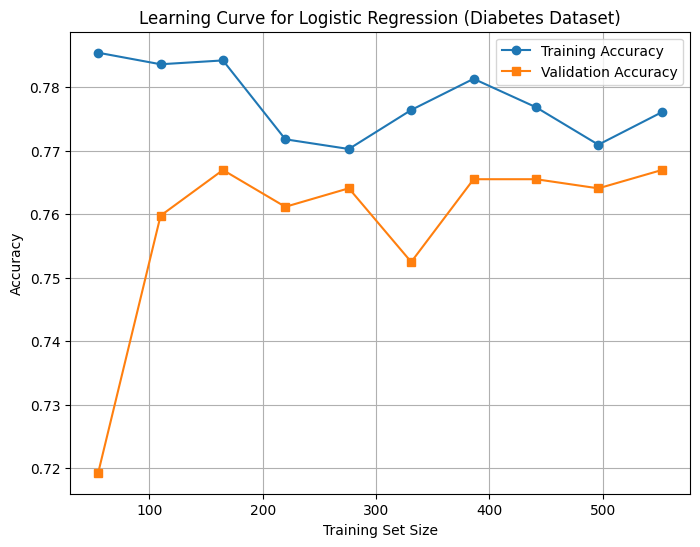

In [42]:
# Plot accuracy curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model, X=X_train, y=y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='s')
plt.title('Learning Curve for Logistic Regression (Diabetes Dataset)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [129]:
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[48  5]
 [ 9 15]]


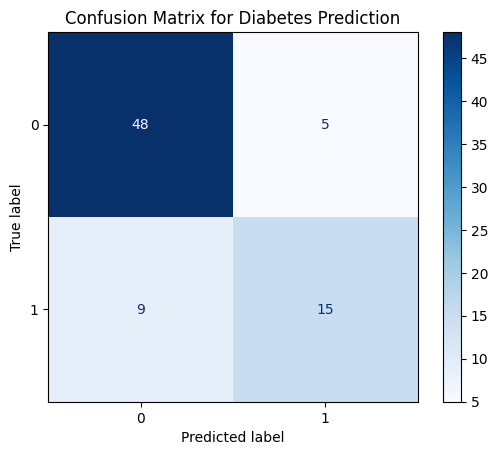

In [154]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix for diabetes prediction (example data)
#confusion_matrix = np.array([[48, 5], [9, 15]])  
#classes = ['Non-Diabetic', 'Diabetic']

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix#, display_labels=classes)
disp.plot(cmap='Blues')

# Add title
plt.title('Confusion Matrix for Diabetes Prediction')
plt.show()


In [150]:
# paitentid_54=pd.DataFrame([1,123,126,60,0,30.1,0.349,47],columns=x)
#Defining a sample data to test the model
x=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data=[0,170,126,60,35,30.1,0.649,78]
paitentid_54=pd.DataFrame([data],columns=x)
paitentid_54.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,170,126,60,35,30.1,0.649,78


In [132]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
predictions_diabetes=model.predict(paitentid_54)d

C:\python\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [134]:
print(predictions_diabetes)

[1]
